<a href="https://colab.research.google.com/github/chacha86/BigData3/blob/colab/%EC%97%B0%EC%8A%B5_%EB%AC%B8%EC%A0%9C3_%ED%92%80%EC%9D%B44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 설명
# id: 일련번호
# name: AirBnB 이름
# host_id: 호스트 ID  
# host_name: 호스트 성명 
# neighbourhood_group: 지구명
# neighbourhood : 지역명
# latitude: 위도  
# longitude: 경도  
# room_type: 방 타입  
# price: 가격  
# minimum_nights: 최소 숙박일수  
# number_of_reviews: 리뷰 개수
# last_review: 최근 리뷰 일자
# reviews_per_month: 월 평균 리뷰 수
# calculated_host_listings_count:  호스트에게 대여 가능한 에어비앤비의 총 개수
# availability_365: 1년 중 가능한 대여일

df = pd.read_csv('/content/AB_NYC_2019.csv')
df.head()
df.info()
# df['id'].unique().shape
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


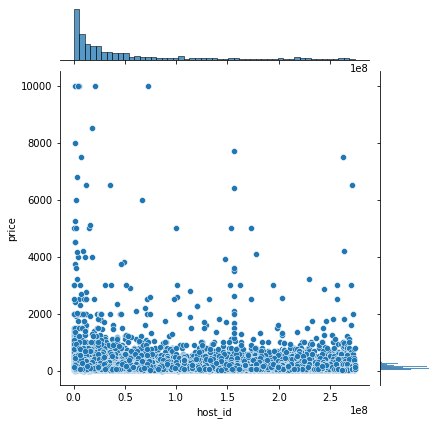

In [ ]:
# 수치형데이터와 price의 상관관계
# jointplot 활용
sns.jointplot(x='host_id', y='price', data=df)

In [ ]:
df.columns

In [ ]:
sns.jointplot(x='number_of_reviews', y='price', data=df)

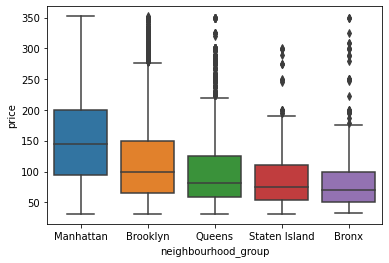

In [ ]:
# 범주형 데이터의 price 상관관계
# countplot -> hue

df['neighbourhood_group'].unique().shape

sns.boxplot(x='neighbourhood_group', y='price', data=df)



In [ ]:
# 불필요해 보이는 컬럼 삭제

df = df.drop(['id', 'name', 'host_name', 'latitude', 'longitude'], axis=1)
df

35.0

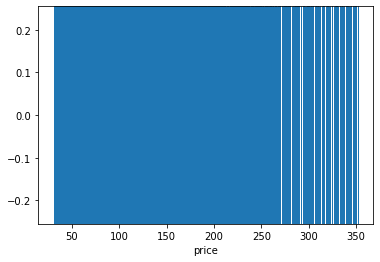

In [ ]:
# 데이터 클리닝 진행 1
# 이상데이터(아웃라이어) 제거
# quantile함수와 rugplot() 활용

# quantile 10등분한 값중 어느쯤에 위치하는지

arr = np.array(np.arange(11))

sr = pd.Series(arr)
sr.quantile(0.01) # 상위 1%

sns.rugplot(x='price', data=df, height=1)

df['price'].quantile(0.95)
df['price'].quantile(0.01)


In [ ]:
max = df['price'].quantile(0.95)
min = df['price'].quantile(0.01)

df = df[(df['price'] > min) & (df['price'] < max)]

In [ ]:
sns.jointplot(x='host_id', y='price', data=df)

In [ ]:
sns.jointplot(x='number_of_reviews', y='price', data=df)
# df.info()
# df.describe()

In [ ]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)

In [ ]:
# minimum_nights의 아웃라이어 제거해 보기
sns.rugplot(x='minimum_nights', data=df, height=1)

max = df['minimum_nights'].quantile(0.95)
min = df['minimum_nights'].quantile(0.01)
print(max, min)

max = df['minimum_nights'].quantile(0.95)
min = df['minimum_nights'].quantile(0.01)

df = df[(df['minimum_nights'] > min) & (df['minimum_nights'] < max)]
df

In [ ]:
# 데이터 클리닝 진행2
# 범주형 데이터 정리
# availability_365의 경우 0이 너무 많으므로 범주형 데이터로 바꾸기

df['availability_365'].value_counts()

# 0은 의미를 가질수도 있고 갖지 않을 수도 있다. 숫자 데이터는 결측치로 0을 사용하는 경우가 많다.
# 결측치 처리는 어떻게 하는가?
# 결측치가 너무 많으면-> 결측치가 있는 행 제거
# 한열에 결측치가 너무 많으면 -> 열 자체를 제거
# 중앙값 넣기, 평균값 넣기
# 전부 0처리 -> 권장X
# 재가공

# availability_365의 경우데 0인 데이터가 너무 많으므로 데이터를 아예 크게 0인것과 0이 아닌 범주형 데이터로 바꾸어 사용하는 방법을 사용한다.

# availability_365 컬럼에서 값이 0인 것을 찾아 zerotype으로 바꿈
dfc = df.copy()
dfc.loc[dfc['availability_365'] == 0, 'availability_365'] = 'zerotype'



In [25]:
dfc.loc[dfc['availability_365'] != 'zerotype', 'availability_365'] = 'nonzero'
dfc['availability_365'].unique()
dfc

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,nonzero
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,zerotype
5,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,nonzero
7,8967,Manhattan,Hell's Kitchen,Private room,79,2,430,2019-06-24,3.47,1,nonzero
8,7490,Manhattan,Upper West Side,Private room,79,2,118,2017-07-21,0.99,1,zerotype
...,...,...,...,...,...,...,...,...,...,...,...
48888,274321313,Manhattan,Hell's Kitchen,Private room,125,4,0,NaN,NaN,1,nonzero
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,nonzero
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,nonzero
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,nonzero


In [ ]:
# 미기입/오기입 데이터 처리하기
# 새로운 데이터 유형으로 재가공
# reviews_per_month, review_count는 같은 의미를 가진 결측치이므로 이 둘을 반영하기 위해 리뷰 있음/없음으로 재가공
df2 = pd.read_csv('/content/AB_NYC_2019.csv')

df2.info()
df2.describe()

In [49]:
# last_review
# reviews_per_month
# 결측치 확인 -> isna()

# print(df2['last_review'].isna())
# print(df2['reviews_per_month'].isna()) # 참 1, 거짓 0


# last_review와 reviews_per_month의 결측지 위치가 동일함
print(((df2['last_review'].isna()) & (df2['reviews_per_month'].isna())).sum())

# last_review 결측치 수와 number_of_reviews의 0의 값이 일치함 --> 0을 결측치로 봐야함.
df2['last_review'].isna().sum()

(df2['number_of_reviews'] == 0).sum()


10052


10052

In [ ]:
# 리뷰의 결측치를 감안하고 사용하기 위해 리뷰 데이터를 범주형 데이터로 재가공. 리뷰 있음, 없음
def set_review_yn(flag) :
  if flag == True :
    return 'No'
  return 'Yes'


df2['review_yn'] = df2['reviews_per_month'].isna().apply(set_review_yn)
df2

dfc['review_yn'] = dfc['reviews_per_month'].isna().apply(set_review_yn)


In [ ]:
# 결측치 채우기
# fillna 함수 활용 - 데이터프레임의 NaN을 특정 값으로 대체
dfc.fillna(0)

In [ ]:
# 데이터 전처리1
# 범주형 데이터 ont-hot 인코딩

In [ ]:
# 데이터 전처리2
# 수치형 데이터 표준화

In [ ]:
# 훈련데이터와 타겟데이터 구분하고 훈련용, 테스트용 분리하기

In [ ]:
# 선형회귀 모델 학습 및 평가